## Task 1.1

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tabulate import tabulate

In [19]:

def load_data(filename):
    my_list = []
    with open(filename, 'r', encoding='utf-8') as h:
        for i, line in enumerate(h):
            if i == 0:
                continue
            row = line.strip().split(',')
            my_list.append(row)
    return my_list

data = load_data("Booli_sold.csv")

def calculate_price_per_square(all_data):
    results = []
    for row in all_data:
            try:
                list_price = float(row[0])
                square_meters = float(row[2])
                sold_price = float(row[9])

                if square_meters > 0:
                    price_per_sqm = sold_price / square_meters
                else:
                    price_per_sqm = None  # Invalid data, no calculation
                
                # Append the result to the list for the current dataset
                results.append({
                    "List price": list_price,
                    "Square meters": square_meters,
                    "Sold price": sold_price,
                    "Price per square meters": price_per_sqm
                })

            except (ValueError, IndexError):
                # Handle cases where data is missing or invalid
                results.append({
                    "List price": None,
                    "Square meters": None,
                    "Sold price": None,
                    "Price per square meters": None
                })
        # Add the results of the current list to the overall results
    return results

results = calculate_price_per_square(data)

header = results[0].keys()

# Prepare the rows (values of the dictionaries)
rows = [list(entry.values()) for entry in results]

# Print the table using tabulate
print(tabulate(rows, headers=header, tablefmt="fancy grid"))

  List price    Square meters    Sold price    Price per square meters
------------  ---------------  ------------  -------------------------
   3.995e+06             73       3.82e+06                     52328.8
   1.995e+06             36       2.355e+06                    65416.7
   5.1e+06               81       6.11e+06                     75432.1
   5.495e+06            107       8.05e+06                     75233.6
   1.995e+06             29       2.4e+06                      82758.6
   7.495e+06            125       8.95e+06                     71600
   3.975e+06             79.2     4.2e+06                      53030.3
   3.25e+06              64.3     3.3e+06                      51321.9
   3.25e+06              64.3     3.15e+06                     48989.1
   5.495e+06             96       5.4e+06                      56250
   2.295e+06             29       2.42e+06                     83448.3
   2.495e+06             47       3.26e+06                     69361.7
   4.75e+0

# Task 1.2

In [ ]:
def most_expensive_apartment(data, top_n = 5):
    results = calculate_price_per_square(data)

    valid_results = [entry for entry in results if entry ['Price per square meters'] is not None]

    sorted_results = sorted(valid_results, key=lambda x: x['Price per square meters'], reverse= True)

    return sorted_results[:top_n]

top_apartments = most_expensive_apartment(data, top_n=5)

def header_for_apartments(top_apartments):
    header = ['List Price', 'Square Meters', 'Sold Price', 'Price per Square Meters']

    apartments_as_lists = [
        [apartment['List price'], apartment['Square meters'], apartment['Sold price'], apartment['Price per square meters']]
        for apartment in top_apartments
    ]
    return [header] + apartments_as_lists


header = ['List Price', 'Square Meters', 'Sold Price', 'Price per Square Meters']

# Convert dictionary results into rows for the table
rows = [
    [apartment['List price'], apartment['Square meters'], apartment['Sold price'], apartment['Price per square meters']]
    for apartment in top_apartments
]

# Print the table using tabulate
print(tabulate(rows, headers=header, tablefmt="grid"))

# Task 1.3

In [ ]:
def extract_ekhagsvagen_data(all_data):
    ekhagsvagen_data = []
    
    # Iterate through the list of data
    for row in all_data:
        # Extract the address (assuming it's in column 16, index 16)
        if len(row) > 16:
            address = row[16].strip()  # Remove any surrounding whitespace

            # Check if the address contains 'Ekhagsvägen'
            if 'Ekhagsvägen' in address:
                ekhagsvagen_data.append(row)  # Add the row to the list
    return ekhagsvagen_data


def calculate_avg_ppsqm(data):
    total_ppsqm = 0
    count = 0

    for row in data:
        try:
            list_price = float(row[0])  
            square_meters = float(row[2])  
            sold_price = float(row[9])  

            if square_meters > 0:  
                price_per_sqm = sold_price / square_meters
                total_ppsqm += price_per_sqm
                count += 1
        except (ValueError, IndexError):
            continue  # Skip rows with invalid data
    
    if count > 0:
        avg_ppsqm = total_ppsqm / count
    else:
        avg_ppsqm = None  
    
    return avg_ppsqm

ekhagsvagen_data = extract_ekhagsvagen_data(all_data=data)
avg_ppsqm_ekhagen = calculate_avg_ppsqm(ekhagsvagen_data)
print(f'The avereage ppsqm in Ekhagen is: {avg_ppsqm_ekhagen}')

# Task 1.4

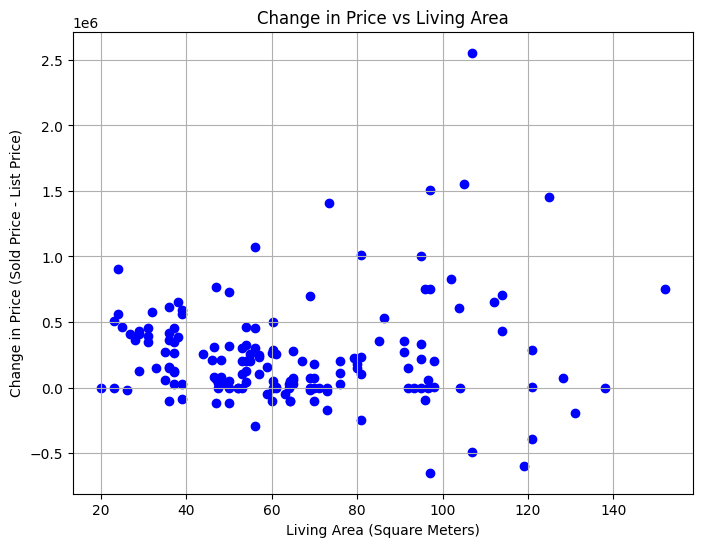

In [31]:
living_area = []
price_change = []

# Loop through the data and only add valid entries
for entry in results:
    list_price = entry['List price']
    sold_price = entry['Sold price']
    
    # Only add data points if both list price and sold price are not None
    if list_price is not None and sold_price is not None:
        living_area.append(entry['Square meters'])
        price_change.append(sold_price - list_price)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(living_area, price_change, color='blue', marker='o')

# Add labels and title
plt.xlabel('Living Area (Square Meters)')
plt.ylabel('Change in Price (Sold Price - List Price)')
plt.title('Change in Price vs Living Area')

# Show grid and plot
plt.grid(True)
plt.show()

## Task 2.1

In [ ]:
def load_data_2(filename):
    my_list_2 = []
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            row = line.strip().split(';')
            my_list_2.append(row)  
    return my_list_2

data_tk2 = load_data_2("2018_R_per_kommun.csv")

def extract_giltiga_for_stockholm(all_data2):
    """Extracts 'RÖSTER GILTIGA' values for 'Stockholms län'."""
    if not all_data2:
        return []

    # Extract the header row
    header = all_data2[0]
    
    # Get the indices of 'LÄNSNAMN' and 'RÖSTER GILTIGA'
    try:
        länsnamn_index = header.index('LÄNSNAMN')
        giltiga_index = header.index('RÖSTER GILTIGA')
    except ValueError as e:
        raise ValueError("One or more columns not found in the header.") from e

    # Filter rows for 'Stockholms län' and extract 'RÖSTER GILTIGA'
    stockholm_giltiga = [
        row[giltiga_index]
        for row in all_data2[1:]  # Skip the header row
        if len(row) > giltiga_index and row[länsnamn_index] == 'Stockholms län'
    ]

    return stockholm_giltiga

def count_roster(giltiga_values):
    try:
        return sum(int(value) for value in giltiga_values)
    except ValueError as l:
        raise ValueError("Non-numeric value encountered in 'RÖSTER GILTIGA'.") from l

giltiga_stockholm = extract_giltiga_for_stockholm(all_data2 = data_tk2)
total_giltiga = count_roster(giltiga_stockholm)
print("Antalet giltiga röster för 'Stockholms län':", total_giltiga)

# Task 2.2

In [ ]:
def majority_votes(all_data3):
    if not all_data3:
        return None, None
    header = all_data3[0]
    try:
        kommun_index = header.index('KOMMUNNAMN')
        x_index = header.index('S')
    except ValueError as t:
        raise ValueError("Saknas data") from t
    max_percentage = -1
    max_municipality = None

    for row in all_data3[1:]:
        if len(row) > x_index:
            try:
                municipality = row[kommun_index]
                percentage = float(row[x_index].replace(',', '.'))
                if percentage > max_percentage:
                    max_percentage = percentage
                    max_municipality = municipality
            except ValueError:
                continue
    return max_municipality, max_percentage

support_municipality, support_percentage = majority_votes(all_data3 = data_tk2)

if support_municipality:
    print(f"The municipality with the highest support for S is '{support_municipality}' with {support_percentage:.2f}%.")
else:
    print("No valid data found for Social Democratic Party support.")



# Task 2.3

In [ ]:
# Integration of Top Participation Ranking
def rank_highest_participation(all_data, top_n=3):
    if not all_data:
        return []

    # Extract the header row
    header = all_data[0]
    
    # Get the indices of 'KOMMUNNAMN' and 'VALDELTAGANDE'
    try:
        kommun_index = header.index('KOMMUNNAMN')
        valdeltagande_index = header.index('VALDELTAGANDE')
    except ValueError as e:
        raise ValueError("One or more required columns not found in the header.") from e

    # Extract participation values and municipalities
    participation_data = []
    for row in all_data[1:]:  # Skip the header
        if len(row) > valdeltagande_index:
            try:
                municipality = row[kommun_index]
                participation = float(row[valdeltagande_index].replace(',', '.'))
                participation_data.append((municipality, participation))
            except ValueError:
                continue  # Skip rows with invalid participation values

    # Sort by participation in descending order
    sorted_participation = sorted(participation_data, key=lambda x: x[1], reverse=True)

    # Return the top N municipalities
    return sorted_participation[:top_n]

# Get the top 3 municipalities with highest participation
top_municipalities = rank_highest_participation(data_tk2, top_n=3)

# Display as a table 
print("\nTop 3 Municipalities by Participation:")
print(tabulate(top_municipalities, headers=["Municipality", "Participation (%)"], tablefmt="grid"))

## Task 3

In [ ]:
def load_data_3(filename):
    my_list_3 = []
    with open(filename, 'r', encoding='utf-8') as g:
        for line in g:
            row = line.strip().split(',')
            my_list_3.append(row)  
    return my_list_3



df_2 = load_data_3("stroke-data.csv")

columns = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
           'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

# Convert the list of lists into a pandas DataFrame
data_frame = pd.DataFrame(df_2, columns=columns)

# Convert numeric columns to the appropriate data type
data_frame['age'] = pd.to_numeric(data_frame['age'], errors='coerce')
data_frame['avg_glucose_level'] = pd.to_numeric(data_frame['avg_glucose_level'], errors='coerce')
data_frame['bmi'] = pd.to_numeric(data_frame['bmi'], errors='coerce')
data_frame['stroke'] = pd.to_numeric(data_frame['stroke'], errors='coerce')

# Select only the relevant numeric columns for correlation
selected_columns = ['age', 'avg_glucose_level', 'bmi', 'stroke']

# Calculate the correlation matrix
correlation_matrix = data_frame[selected_columns].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()